[Описание лабораторной работы](http://localhost:8888/tree/OneDrive/Documents/A-14m-16/2CURSE3SEM/optimal_control/Opisanie_laboratornoi_774_raboty__2.pdf)

In [1]:
print(__doc__)

# Author: Ivan Migal ivan.migal@mail.ru
# License: BSD 3 clause

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D

Automatically created module for IPython interactive environment


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 12, 12
plt.style.use('ggplot')
# Настройка шрифта
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

---
# Вспомогательные функции

In [3]:
# Плотность источников тепла
def func(s, t):
    #return 0.
    return s + t * 4.
    
# Температура внешней среды
def p(t):
    return math.cos(2 * t * math.pi)
    #return t    

def array(f, numval, numdh):
    """Создать N-мерный массив.
    
    param: f - функция, которая приминает N аргументов.
    param: numval - диапазоны значений параметров функции. Список
    param: numdh - шаги для параметров. Список
    
    """
    def rec_for(f, numdim, numdh, current_l, l_i, arr):
        """Рекурсивный цикл.
        
        param: f - функция, которая приминает N аргументов.
        param: numdim - размерность выходной матрицы. Список
        param: numdh - шаги для параметров. Список
        param: current_l - текущая глубина рекурсии.
        param: l_i - промежуточный список индексов. Список
        param: arr - матрица, с которой мы работаем. np.array
        
        """
        for i in range(numdim[current_l]):
            l_i.append(i)
            if current_l < len(numdim) - 1:
                rec_for(f, numdim, numdh, current_l + 1, l_i, arr)
            else:
                args = (np.array(l_i) * np.array(numdh))
                arr[tuple(l_i)] = f(*args)
            l_i.pop()
        return arr
    numdim = [int(numval[i] / numdh[i]) + 1 for i in range(len(numdh))]
    arr = np.zeros(numdim)
    arr = rec_for(f, numdim, numdh, 0, [], arr)
    # Надо отобразить так x - j, y - i (для графиков), поэтому используем transpose
    arr = np.transpose(arr)
    return arr

def TDMA(a, b, c, f):
    """Метод прогонки.
    
    param: a - левая поддиагональ. 
    param: b - правая поддиагональ.
    param: c - центр.
    param: f - правая часть.
    """
    #a, b, c, f = map(lambda k_list: map(float, k_list), (a, b, c, f))
    
    alpha = [0]
    beta = [0]
    n = len(f)
    x = [0] * n

    for i in range(n - 1):
        alpha.append(-b[i] / (a[i] * alpha[i] + c[i]))
        beta.append((f[i] - a[i] * beta[i]) / (a[i] * alpha[i] + c[i]))

    x[n - 1] = (f[n - 1] - a[n - 1] * beta[n - 1]) / (c[n - 1] + a[n - 1] * alpha[n - 1])

    for i in reversed(range(n - 1)):
        x[i] = alpha[i + 1] * x[i + 1] + beta[i + 1]

    return x

---
# Тест для метода прогонки
source: [http://old.exponenta.ru/educat/class/courses/vvm/theme_5/example.asp](http://old.exponenta.ru/educat/class/courses/vvm/theme_5/example.asp)
```
Ответ: (-3, 1, 5, -8)
```

In [4]:
a = [0, 1, 1, 1]
c = [2, 10, -5, 4]
b = [1, -5, 2, 0]
f = [-5, -18, -40, -27]
x = TDMA(a, b, c, f)
x

[-3.0, 0.9999999999999998, 5.0, -8.0]

---
source: [http://kontromat.ru/?page_id=4980](http://kontromat.ru/?page_id=4980) (Ответ там неверный, знак минус у 5 пропущен)
```
Ответ: (-10, 5, -2, -10)
```

In [5]:
a = [0, -3, -5, -6, -5]
c = [2, 8, 12, 18, 10]
b = [-1, -1, 2, -4, 0]
f = [-25, 72, -69, -156, 20]
x = TDMA(a, b, c, f)
x

[-10.0, 5.0, -2.000000000000001, -9.999999999999998, -2.9999999999999996]

---
# Тесты для создания массивов

In [6]:
X_ = np.arange(0., 1.01, .1)
Y_ = np.arange(0., 2.01, .01)
#print(np.shape(X_))
X_, Y_ = np.meshgrid(X_, Y_)
print(np.shape(X_), np.shape(Y_))

(201, 11) (201, 11)


In [7]:
X_

array([[ 0. ,  0.1,  0.2, ...,  0.8,  0.9,  1. ],
       [ 0. ,  0.1,  0.2, ...,  0.8,  0.9,  1. ],
       [ 0. ,  0.1,  0.2, ...,  0.8,  0.9,  1. ],
       ..., 
       [ 0. ,  0.1,  0.2, ...,  0.8,  0.9,  1. ],
       [ 0. ,  0.1,  0.2, ...,  0.8,  0.9,  1. ],
       [ 0. ,  0.1,  0.2, ...,  0.8,  0.9,  1. ]])

In [8]:
Y_

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.01,  0.01,  0.01, ...,  0.01,  0.01,  0.01],
       [ 0.02,  0.02,  0.02, ...,  0.02,  0.02,  0.02],
       ..., 
       [ 1.98,  1.98,  1.98, ...,  1.98,  1.98,  1.98],
       [ 1.99,  1.99,  1.99, ...,  1.99,  1.99,  1.99],
       [ 2.  ,  2.  ,  2.  , ...,  2.  ,  2.  ,  2.  ]])

In [9]:
arr = array(func, [1., 2.], [.1, .01])
print(np.shape(arr))
arr

(201, 11)


array([[ 0.  ,  0.1 ,  0.2 , ...,  0.8 ,  0.9 ,  1.  ],
       [ 0.04,  0.14,  0.24, ...,  0.84,  0.94,  1.04],
       [ 0.08,  0.18,  0.28, ...,  0.88,  0.98,  1.08],
       ..., 
       [ 7.92,  8.02,  8.12, ...,  8.72,  8.82,  8.92],
       [ 7.96,  8.06,  8.16, ...,  8.76,  8.86,  8.96],
       [ 8.  ,  8.1 ,  8.2 , ...,  8.8 ,  8.9 ,  9.  ]])

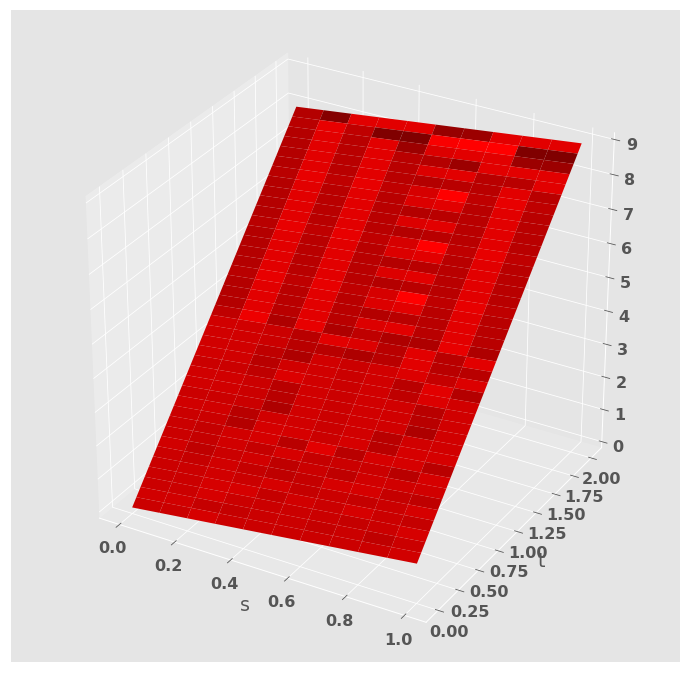

In [10]:
Z = arr

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_, Y_, Z, color='r')
plt.xlabel('s')
plt.ylabel('t')

plt.show()

In [11]:
arr = array(p, [1.], [.001])
arr

array([ 1.        ,  0.99998026,  0.99992104, ...,  0.99992104,
        0.99998026,  1.        ])

---
# Создание класса модели
```
Ссылки:
```
[Трехточечные производные](https://studopedia.ru/9_85271_vichislenie-pervih-proizvodnih-po-trehtochechnim-shemam.html)

[Трехточечные производные (локальная ссылка)](http://localhost:8888/tree/OneDrive/Documents/A-14m-16/2CURSE3SEM/optimal_control/9_85271_vichislenie-pervih-proizvodnih-po-trehtochechnim-shemam.html)

[Аппроксимация схемы](http://math.phys.msu.ru/data/374/tema3.pdf)

[Аппроксимация схемы (локальная ссылка)](http://localhost:8888/tree/OneDrive/Documents/A-14m-16/2CURSE3SEM/optimal_control/tema3.pdf)

[Самарский. Введение в теорию разностных схем (локальная ссылка)](http://localhost:8888/tree/OneDrive/Documents/A-14m-16/2CURSE3SEM/optimal_control/Самарский_Введение_в_теорию_разностных_схем.pdf)

In [16]:
# Класс модели для Л.Р №2
class Lab2OptCtrlModel():
    
    def __init__(self, p_d):
        
        self.a, self.l, self.T = p_d['a'], p_d['l'], p_d['T']
        self.p, self.f = p_d['p(t)'], p_d['f(s, t)']
        self.p_l = p_d['p_l(t)']
        self.R_0, self.R_1 = p_d['R_0'], p_d['R_1']
        self.y = p_d['y(s)']
        
        self.fi_0, self.fi_1, self.d2fi_0 = p_d['fi_0(s)'], p_d['fi_1(s)'], p_d['d2fi_0(s)']
        
        self.dh, self.dt = p_d['dh'], p_d['dt']
        self.N, self.M = p_d['N'], p_d['M']
        
        self.sigma = p_d['sigma']
        
        self.p_arr = array(self.p, [p_d['T']], [p_d['dt']])
        self.p_l_arr = array(self.p_l, [p_d['T']], [p_d['dt']])
        
        self.f_arr = []
        self.f_arr.append(array(self.f, [p_d['l'], p_d['T']], [p_d['dh'], p_d['dt']]))
        
        self.fi_0_arr = array(self.fi_0, [p_d['l']], [p_d['dh']])
        self.fi_1_arr = array(self.fi_1, [p_d['l']], [p_d['dh']])
        self.d2fi_0_arr = array(self.d2fi_0, [p_d['l']], [p_d['dh']])
        
        self.x_arr = []
        self.x_arr.append(array(lambda s, t: 0., [p_d['l'], p_d['T']], [p_d['dh'], p_d['dt']]))
        self.x_arr[0][0,:] = array(self.fi_0, [p_d['l']], [p_d['dh']])
        
    def Solve(self, eps=10**-5):
        
        ind = 0
        
        # Число уравнений
        eq_l = self.N - 1
        
        dh, dt, sigma = self.dh, self.dt, self.sigma
        
        a_dt_dh_2 = (self.a * dt / dh) ** 2
        
        const_1, const_2 = a_dt_dh_2 * sigma, a_dt_dh_2 * (1. - 2. * sigma)
        const_3 = (1. + 2 * const_1)
        
        fi_0_arr, fi_1_arr, d2fi_0_arr = self.fi_0_arr, self.fi_1_arr, self.d2fi_0_arr
        
        f_arr = self.f_arr[ind]
        
        x_arr = self.x_arr[ind]
        
        # j=0
        x_arr[0,:] = fi_0_arr
        
        # j=1
        x_arr[1,:] = fi_0_arr + dt * fi_1_arr + dt ** 2 / 2. * (d2fi_0_arr * self.a ** 2 + f_arr[0,:])
        
        # a
        a =  [0.]
        a += [-const_1 for i in range(2, eq_l)]
        a += [-const_1 * 2. / 3.]
        
        # b
        b =  [-const_1 * 2. / 3.]
        b += [-const_1 for i in range(2, eq_l)]
        b += [0.]
        
        # c
        c =  [const_3 - const_1 * 4. / 3.]
        c += [const_3 for i in range(2, eq_l)]
        c += [const_3 - const_1 * 4. / 3.]
        
        # Остальные временные слои
        for j in range(2, self.M + 1):
            
            # Правая часть 
            
            # 3 строка ?
            f = [2. * x_arr[j - 1, 1] - x_arr[j - 2, 1] +\
                 const_2 * (x_arr[j - 1, 0] - 2. * x_arr[j - 1, 1] + x_arr[j - 1, 2]) +\
                 const_1 * (x_arr[j - 2, 0] - 2. * x_arr[j - 2, 1] + x_arr[j - 2, 2]) +\
                 f_arr[j - 1, 1] * dt ** 2 -\
                 const_1 * 2. * dh * self.p_arr[j] / 3. # ?
                ]
            
            # 3 строка ?
            f += [2. * x_arr[j - 1, i] - x_arr[j - 2, i] +\
                  const_2 * (x_arr[j - 1, i - 1] - 2. * x_arr[j - 1, i] + x_arr[j - 1, i + 1]) +\
                  const_1 * (x_arr[j - 2, i - 1] - 2. * x_arr[j - 2, i] + x_arr[j - 2, i + 1]) +\
                  f_arr[j - 1, i] * dt ** 2
                    for i in range(2, eq_l + 1)
                ]
            
            f[-1] += const_1 * 2. * dh * self.p_l_arr[j] / 3. # ?
            
            x_arr[j, 1:1 + eq_l] = TDMA(a, b, c, f)
        
            # краевые условия
            x_arr[j, 0] = (4. * x_arr[j, 1] - x_arr[j, 2] - 2. * dh * self.p_arr[j]) / 3.
            x_arr[j, -1] = (4. * x_arr[j, -2] - x_arr[j, -3] + 2. * dh * self.p_l_arr[j]) / 3.
            
        self.x_arr[ind] = x_arr
        return self.x_arr[ind]

---
# Тесты для 1 задачи

In [50]:
# Словарь параметров
p_d = {}

# Заданные положительные величины
p_d['a'], p_d['l'], p_d['T'] = 5., 1., 1.

# Решение тестового примера
def x(s, t):
    #return math.exp(t * p_d['a'] / p_d['l']) * math.sin(s * math.pi / (2. * p_d['l']))
    #return math.sin(s * math.pi / (2. * p_d['l']))
    #return ((t + 1.) * (s - p_d['l'])) ** 2
    return t ** 2 * (s - p_d['l']) ** 2
    #return (s - p_d['l']) ** 2
    #return s ** 2
    
# Плотность внешних сил
def f(s, t):
    #return math.exp(t * p_d['a'] / p_d['l']) * math.sin(s * math.pi / (2. * p_d['l'])) * (1. + (math.pi / 2.) ** 2) * (p_d['a'] / p_d['l']) ** 2
    #return math.sin(s * math.pi / (2. * p_d['l'])) * ((p_d['a'] * math.pi / (2. * p_d['l'])) ** 2)
    #return 2. * (s - p_d['l']) ** 2 - 2. * p_d['a'] ** 2 * (t + 1.) ** 2
    return -2. * (p_d['a'] * t) ** 2 + 2. * (s - p_d['l']) ** 2
    #return -2. * p_d['a'] ** 2
    #return -2. * p_d['a'] ** 2

# Внешняя сила, действующая на левый конец
def p(t):
    #return math.exp(t * p_d['a'] / p_d['l']) * math.pi / (2. * p_d['l'])
    #return math.pi / (2. * p_d['l'])
    #return -2. * p_d['l'] * (t + 1.) ** 2
    return -2. * p_d['l'] * t ** 2
    #return -2. * p_d['l']
    #return 0.

# Внешняя сила, действующая на правый конец
def p_l(t):
    #return 0.
    #return 0.
    #return 0.
    return 0.
    #return 0.
    #return 2. * p_d['l']

# Положение струны в начальный момент времени
def fi_0(s):
    #return math.sin(s * math.pi / (2. * p_d['l']))
    #return math.sin(s * math.pi / (2. * p_d['l']))
    #return (s - p_d['l']) ** 2
    return 0.
    #return (s - p_d['l']) ** 2
    #return s ** 2
    
# Вторая производная по s положение струны в начальный момент времени
def d2fi_0(s):
    #return -math.sin(s * math.pi / (2. * p_d['l'])) * (math.pi / (2. * p_d['l'])) ** 2
    #return -math.sin(s * math.pi / (2. * p_d['l'])) * (math.pi / (2. * p_d['l'])) ** 2
    #return  2.
    return 0.
    #return 2.
    #return 2.

# скорость струны в начальный момент времени
def fi_1(s):
    #return math.sin(s * math.pi / (2. * p_d['l'])) * p_d['a'] / p_d['l']
    #return 0.
    #return 2. * (s - p_d['l']) ** 2
    return 0
    #return 0.
    #return 0.

p_d['p(t)'] = p

p_d['p_l(t)'] = p_l

p_d['f(s, t)'] = f

# Заданные числа
p_d['R_0'], p_d['R_1'] = 100., 100.

p_d['fi_0(s)'], p_d['fi_1(s)'], p_d['d2fi_0(s)'] = fi_0, fi_1, d2fi_0

# Желаемое распределение температуры
def y(s):
    return s

p_d['y(s)'] = y

# Значение веса в схеме
p_d['sigma'] = 0. / 3.

p_d['N'] = 4

# Число точек на пространственной и временной сетке соответственно
if p_d['sigma'] <= 1. / 4.:  
    p_d['M'] = math.ceil(p_d['N'] * p_d['a'] * p_d['T'] / p_d['l'])
else:
    p_d['M'] = 120

# Шаг на пространственной и временной сетке соответственно
p_d['dh'], p_d['dt'] = p_d['l'] / p_d['N'], p_d['T'] / p_d['M']
p_d['l'], p_d['T'], p_d['dh'], p_d['dt'], p_d['sigma'], p_d['N'], p_d['M']

(1.0, 1.0, 0.25, 0.05, 0.0, 4, 20)

In [51]:
X_ = np.arange(0., p_d['l'] + p_d['dh'] / 4., p_d['dh'])
Y_ = np.arange(0., p_d['T'] + p_d['dt'] / 4., p_d['dt'])
X_, Y_ = np.meshgrid(X_, Y_)
print(np.shape(X_), np.shape(Y_))

(21, 5) (21, 5)


In [52]:
model = Lab2OptCtrlModel(p_d)
x_arr = model.Solve()

In [53]:
x_arr

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  2.50000000e-03,   1.40625000e-03,   6.25000000e-04,
          1.56250000e-04,   0.00000000e+00],
       [  1.00000000e-02,   5.62500000e-03,   2.50000000e-03,
          6.25000000e-04,   0.00000000e+00],
       [  2.25000000e-02,   1.26562500e-02,   5.62500000e-03,
          1.40625000e-03,  -2.89120579e-19],
       [  4.00000000e-02,   2.25000000e-02,   1.00000000e-02,
          2.50000000e-03,  -5.78241159e-19],
       [  6.25000000e-02,   3.51562500e-02,   1.56250000e-02,
          3.90625000e-03,  -4.62592927e-18],
       [  9.00000000e-02,   5.06250000e-02,   2.25000000e-02,
          5.62500000e-03,  -8.09537622e-18],
       [  1.22500000e-01,   6.89062500e-02,   3.06250000e-02,
          7.65625000e-03,  -4.62592927e-18],
       [  1.60000000e-01,   9.00000000e-02,   4.00000000e-02,
          1.00000000e-02,  -2.54426110e-17],
       [  2.02500000e-01,   1.1390625

In [54]:
x_arr_1 = array(x, [p_d['l'], p_d['T']], [p_d['dh'], p_d['dt']])

In [55]:
x_arr_1

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  2.50000000e-03,   1.40625000e-03,   6.25000000e-04,
          1.56250000e-04,   0.00000000e+00],
       [  1.00000000e-02,   5.62500000e-03,   2.50000000e-03,
          6.25000000e-04,   0.00000000e+00],
       [  2.25000000e-02,   1.26562500e-02,   5.62500000e-03,
          1.40625000e-03,   0.00000000e+00],
       [  4.00000000e-02,   2.25000000e-02,   1.00000000e-02,
          2.50000000e-03,   0.00000000e+00],
       [  6.25000000e-02,   3.51562500e-02,   1.56250000e-02,
          3.90625000e-03,   0.00000000e+00],
       [  9.00000000e-02,   5.06250000e-02,   2.25000000e-02,
          5.62500000e-03,   0.00000000e+00],
       [  1.22500000e-01,   6.89062500e-02,   3.06250000e-02,
          7.65625000e-03,   0.00000000e+00],
       [  1.60000000e-01,   9.00000000e-02,   4.00000000e-02,
          1.00000000e-02,   0.00000000e+00],
       [  2.02500000e-01,   1.1390625

In [56]:
abs(x_arr - x_arr_1)[2:6,:]

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  3.46944695e-18,   3.46944695e-18,   0.00000000e+00,
          2.16840434e-19,   2.89120579e-19],
       [  0.00000000e+00,   3.46944695e-18,   3.46944695e-18,
          1.30104261e-18,   5.78241159e-19],
       [  1.38777878e-17,   6.93889390e-18,   0.00000000e+00,
          3.46944695e-18,   4.62592927e-18]])

In [57]:
error = np.max(abs(x_arr - x_arr_1))
error, p_d['dh'] ** 2 + p_d['dt'] ** 2, error < p_d['dh'] ** 2 + p_d['dt'] ** 2, np.argmax(abs(x_arr - x_arr_1))

(2.5905203907920321e-16, 0.065, True, 104)

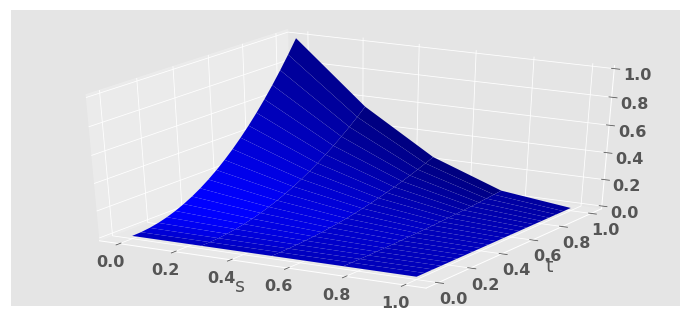

In [58]:
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
Z = x_arr_1
ax.plot_surface(X_, Y_, Z, color='b')
plt.xlabel('s')
plt.ylabel('t')
#ax.set_zlim(0, np.max(x_arr_1))

plt.show()

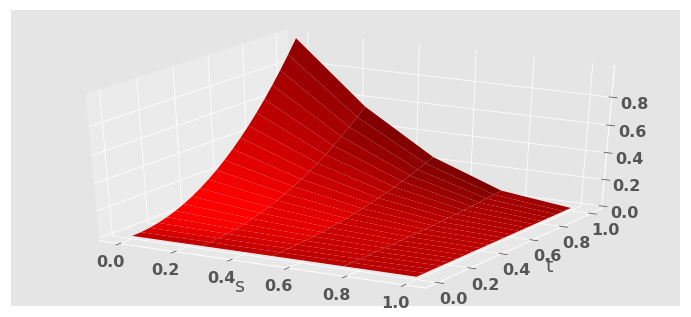

In [59]:
fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
Z = x_arr
ax.plot_surface(X_, Y_, Z, color='r')
plt.xlabel('s')
plt.ylabel('t')
#ax.set_zlim(0, np.max(x_arr))

plt.show()

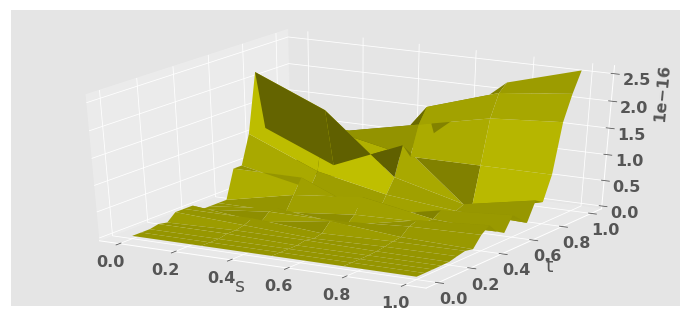

In [60]:
Z = abs(x_arr - x_arr_1)

fig = plt.figure()
ax = fig.add_subplot(211, projection='3d')
ax.plot_surface(X_, Y_, Z, color='y')
plt.xlabel('s')
plt.ylabel('t')

plt.show()